# IRF Magnetic data analysis

Start by importing some stuff

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#and definig the file name of the given data to analyse
file = 'mag_sheath.txt'

Load the data. Everything is loaded as a string, and column names will be added manually later

In [2]:
data = np.loadtxt(file, skiprows=1, dtype='str')

Have a look at the data

In [3]:
data

array([['2014-11-11/23:12:37', '1588', '235', '1.82', '5.60', '-0.58'],
       ['2014-11-12/03:28:05', '1989', '236', '-2.04', '9.90', '1.98'],
       ['2014-11-12/21:56:13', '1870', '240', '-0.00', '3.56', '4.74'],
       ...,
       ['2022-09-29/20:04:26', '1925', '17302', '-3.30', '-11.40',
        '-2.44'],
       ['2022-09-30/10:47:49', '2012', '17306', '4.89', '2.41', '0.83'],
       ['2022-09-30/18:06:01', '1978', '17308', '2.78', '-3.01', '0.68']],
      dtype='<U19')

Convert the Numpy array to a Pandas Dataframe for prettiness, and for adding the column names. Both df (pd) and data (np) can be used now

In [4]:
df = pd.DataFrame(data, columns = ['Time', 'number of data points', 'orbit number', 'Bx_mso (nT)', 'By_mso (nT)', 'Bz_mso (nT)'])

#### Pretty data

In [5]:
#we could/should still convert the time column to DateTime and the points to floats here
df

,Time,number of data points,orbit number,Bx_mso (nT),By_mso (nT),Bz_mso (nT)
0,2014-11-11/23:12:37,1588,235,1.82,5.60,-0.58
1,2014-11-12/03:28:05,1989,236,-2.04,9.90,1.98
2,2014-11-12/21:56:13,1870,240,-0.00,3.56,4.74
3,2014-11-13/02:17:49,2185,241,-0.86,3.55,2.84
4,2014-11-13/16:42:15,1259,244,-0.93,5.27,0.39
...,...,...,...,...,...,...
8411,2022-09-29/12:47:57,1972,17300,-1.33,-4.02,2.90
8412,2022-09-29/16:22:29,1862,17301,-4.04,-10.08,1.01
8413,2022-09-29/20:04:26,1925,17302,-3.30,-11.40,-2.44
8414,2022-09-30/10:47:49,2012,17306,4.89,2.41,0.83


Converting the strings to floats:

In [26]:
df['number of data points'] = df['number of data points'].astype(float)
df['orbit number'] = df['orbit number'].astype(float)
df['Bx_mso (nT)'] = df['Bx_mso (nT)'].astype(float)
df['By_mso (nT)'] = df['By_mso (nT)'].astype(float)
df['Bz_mso (nT)'] = df['Bz_mso (nT)'].astype(float)

converting the time string to datetime:

In [27]:
df['Time'] = pd.to_datetime(df['Time'])

### Now our data is perfect, with time as datetimetype, and all numbers as floats

In [28]:
df

,Time,number of data points,orbit number,Bx_mso (nT),By_mso (nT),Bz_mso (nT)
0,2014-11-11 23:12:37,1588.0,235.0,1.82,5.60,-0.58
1,2014-11-12 03:28:05,1989.0,236.0,-2.04,9.90,1.98
2,2014-11-12 21:56:13,1870.0,240.0,-0.00,3.56,4.74
3,2014-11-13 02:17:49,2185.0,241.0,-0.86,3.55,2.84
4,2014-11-13 16:42:15,1259.0,244.0,-0.93,5.27,0.39
...,...,...,...,...,...,...
8411,2022-09-29 12:47:57,1972.0,17300.0,-1.33,-4.02,2.90
8412,2022-09-29 16:22:29,1862.0,17301.0,-4.04,-10.08,1.01
8413,2022-09-29 20:04:26,1925.0,17302.0,-3.30,-11.40,-2.44
8414,2022-09-30 10:47:49,2012.0,17306.0,4.89,2.41,0.83


Have a quick look at the shape to see what we are dealing with

In [44]:
print('dataframe shape is: ', df.shape)
print('datframe is ', df.shape[0], ' values long, and ', df.shape[1], ' wide')

dataframe shape is:  (8416, 7)
datframe is  8416  values long, and  7  wide


## Now we plot the Bx_mso(nt) over time
There is definitely interesting patterns to analyse here

<AxesSubplot:xlabel='Time'>

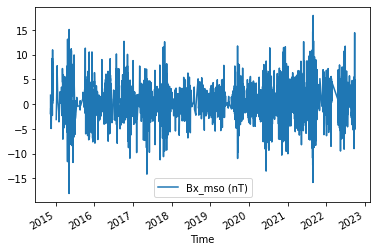

In [29]:
df.plot(x='Time',y='Bx_mso (nT)')

Because we are not only looking at the x component, we create a culminative xyz component to analyse all components simultaneously

In [39]:
df['cumulative'] = df['Bx_mso (nT)'] + df['By_mso (nT)'] + df['Bz_mso (nT)']

This new column looks as follows:

In [41]:
df['cumulative']

0        6.84
1        9.84
2        8.30
3        5.53
4        4.73
        ...  
8411    -2.45
8412   -13.11
8413   -17.14
8414     8.13
8415     0.45
Name: cumulative, Length: 8416, dtype: float64

And now we anlayse this new, cumulative plot that we made:

<AxesSubplot:title={'center':'cumulative component analysis'}, xlabel='Time'>

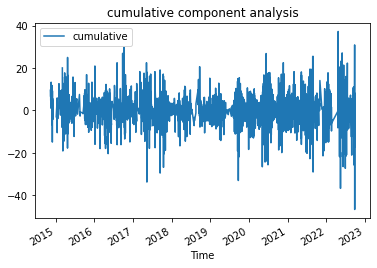

In [42]:
df.plot(x='Time',y='cumulative', title = 'cumulative component analysis')

let's make a magnitude calculation + column together
fun exercise

In [ ]:
we can take individual components like this:

In [47]:
df['Bx_mso (nT)'][5]

-0.55

In [ ]:
then we can square them, and add the others:

In [49]:
df['Bx_mso (nT)'][5] **2

0.30250000000000005

In [50]:
df['By_mso (nT)'][5] **2

51.1225

In [ ]:
So we don't need a numpy function, we can just calculate it 'by hand'

okay, let's talk more about this later 